### Title: Car Pricing Evaluation

##### Sources: (a) Creator: Marko Bohanec (b) Donors: Marko Bohanec (marko.bohanec@ijs.si) Blaz Zupan (blaz.zupan@ijs.si)

#### Analysing Car Prices Based on Different Attributes.
#### Data Analysis, Preprocessing  and Visuals
#### Data Split and Applying Model with Standarization
#### Test Metrics

# Clasification
* Classification is a data mining function that assigns items in a collection to target categories or classes. The goal of classification is to accurately predict the target class for each case in the data.
* These predictions are done on the basis of the features of any object, as the objects belonging to a class does have some common features.
* A lot of feature extraction and selection techniques have been devoled in various feilds.
* We'll start classification with a simple dataset of extracted features so we don't need to bother about feature extraction. 

## Step 1: Import the necessary libraries

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # data processing
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Step 2: Load Dataset

In [76]:
# Load dataset
carprice = pd.read_csv("C:/Users/RAVI/Favorites/Downloads/car_evaluation.csv", names = ["buying","maint", "doors", "persons", "lug_boot","safety","class"])
carprice.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [78]:
carprice.shape  # we have 1728 rows and 7 columns in the dataset 

(1728, 7)

In [83]:
carprice.isna().count() #no missing values present 

buying      1728
maint       1728
doors       1728
persons     1728
lug_boot    1728
safety      1728
class       1728
dtype: int64

## Preprocessing the data
* Here, the dataset contains 6 attributes and 1 class column having 4 class values{unacc, acc, good, vgood}. As we are going to   find mathematical models.

* so we convert all the nominal/categorical data into numeric by using pandas.get_dummies function. This function will create additional columns of each values corresponding to each attribute, therefore increasing the number of total columns.

In [74]:
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}
                }
carprice.replace(cleanup_nums,inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F0B1510>]],
      dtype=object)

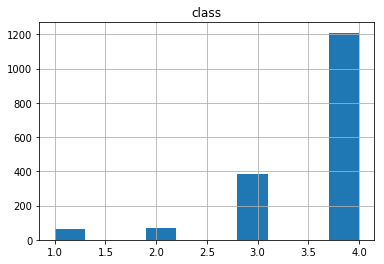

In [75]:
carprice.hist()   #quick plot comparison of class 

* Samples distributed among 'Classes' have a Negative skew, with majority being in the 'unacc'(unacceptable),'acc'(acceptable) output class

In [61]:
carprice.describe()

,class
count,1728.000000
mean,3.585069
std,0.740700
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,4.000000


In [62]:
target = carprice['class']
carprice.drop( ['class'],axis = 1,inplace = True)

In [63]:
carprice = pd.get_dummies(df)
carprice.head()

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


## Step 3: Split the data into 'Testing and Training' Portions

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df,target,random_state = 0)

## Step 4: Fit mathemtical model and Standardize it

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
import warnings
warnings.filterwarnings("ignore")

## Step 5: Apply the Classifier

### a) Perceptron

In [66]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(n_iter=3501, eta0=0.1, random_state=0)
ppn.fit(X_train_std,Y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=3501, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

### b) SVM

In [36]:
from sklearn import svm
from sklearn.svm import SVC
svc = svm.SVC(kernel='linear', C=1).fit(X_train_std,Y_train)

### c) Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
model.score(X_train_std,Y_train)
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)

Coefficient: 
 [[-2.15639759e+00  1.26324804e+00  7.15401406e-01 -2.26392177e+00
  -8.30921278e-01  4.28255734e-01  3.59286327e-01 -2.39829069e+00
  -1.02861190e+00 -6.20756966e-01 -4.79962356e-01 -3.12338688e-01
  -2.78850179e+00  7.42656958e-02  2.72566187e-01  5.47260726e-01
  -2.54527359e-01 -2.73440328e+00  1.76075378e+00 -2.14973737e+00
  -2.05268632e+00]
 [-1.90310282e+00  1.38490346e+00  4.37340497e-01 -1.96495793e+00
  -1.97214148e+00  1.27132141e+00  4.74796020e-01 -1.81979275e+00
  -7.42227578e-01 -4.36488857e-01 -4.73125588e-01 -3.93974770e-01
  -2.49703610e+00  2.58321409e-01  1.92897899e-01 -7.19287905e-01
  -5.75798223e-01 -7.50730666e-01 -3.83298254e-02 -2.42106095e+00
   4.13573985e-01]
 [ 4.99471600e-02 -4.76146195e-01  4.41777920e-02 -7.47369357e-01
  -4.06666219e-02 -2.52353970e-01  6.28896782e-02 -8.99259685e-01
  -6.71247116e-01 -2.64205381e-01  1.86475902e-02 -2.12585693e-01
  -3.44582950e+00  1.24875762e+00  1.06768128e+00 -6.54690872e-02
  -2.33100498e-01 -8.30

### d) Decision Trees

In [38]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier(criterion='gini')
model1.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.8912037037037037

### e) KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Step 6: Predict Test data labels and find Classification Accuracy

In [40]:
y_pred=ppn.predict(X_test_std)
print('Misclassified samples using Perceptron are: %d' %(Y_test!=y_pred).sum())

from sklearn.metrics import accuracy_score
print('Classification Accuracy of Perceptron is %.2f ' %accuracy_score(Y_test,y_pred))

s_pred=svc.predict(X_test_std)
print('Misclassified samples using SVM are: %d' %(Y_test!=s_pred).sum())
print('Classification Accuracy of SVM is %.2f ' %accuracy_score(Y_test,s_pred))

lr_pred= model.predict(X_test)
print('Misclassified samples using Logistic Regression are: %d' %(Y_test!=lr_pred).sum())
print('Classification Accuracy of Logistic Regression is %.2f ' %accuracy_score(Y_test,lr_pred))

t_pred= model1.predict(X_test)
print('Misclassified samples using Trees are: %d' %(Y_test!=t_pred).sum())
print('Classification Accuracy of Decision trees is %.2f ' %accuracy_score(Y_test,t_pred))

k_pred= model2.predict(X_test)
print('Misclassified samples using KNN are: %d' %(Y_test!=k_pred).sum())
print('Classification Accuracy of KNN is %.2f ' %accuracy_score(Y_test,k_pred))

Misclassified samples using Perceptron are: 59
Classification Accuracy of Perceptron is 0.86 
Misclassified samples using SVM are: 31
Classification Accuracy of SVM is 0.93 
Misclassified samples using Logistic Regression are: 67
Classification Accuracy of Logistic Regression is 0.84 
Misclassified samples using Trees are: 20
Classification Accuracy of Decision trees is 0.95 
Misclassified samples using KNN are: 41
Classification Accuracy of KNN is 0.91 


## Conclusion:Decision Trees and SVM are having good accuracy when compared to other models for Classification

#### unacc 1210 (70.023 %) acc 384 (22.222 %) good 69 ( 3.993 %) v-good 65 ( 3.762 %) 
#### These are the class values distributed across the dataset